# Support and Resistance

## Fractals
A fractal is a candlestick pattern made by 5 candles. The third candle has the lowest low price, the previous candles have decreasing lows and the next candles have increasing lows. By this pattern, the low of the third candle is the support level. The same concept applies to resistance levels, where the third candle has the highest high of the five ones.

In [2]:
!!pip install mpl_finance


['Collecting mpl_finance',
 '  Downloading mpl_finance-0.10.1-py3-none-any.whl (8.4 kB)',
 'Requirement already satisfied: matplotlib in /home/tikam/stock-market/env3/lib/python3.10/site-packages (from mpl_finance) (3.8.2)',
 'Requirement already satisfied: contourpy>=1.0.1 in /home/tikam/stock-market/env3/lib/python3.10/site-packages (from matplotlib->mpl_finance) (1.2.0)',
 'Requirement already satisfied: cycler>=0.10 in /home/tikam/stock-market/env3/lib/python3.10/site-packages (from matplotlib->mpl_finance) (0.12.1)',
 'Requirement already satisfied: fonttools>=4.22.0 in /home/tikam/stock-market/env3/lib/python3.10/site-packages (from matplotlib->mpl_finance) (4.47.2)',
 'Requirement already satisfied: kiwisolver>=1.3.1 in /home/tikam/stock-market/env3/lib/python3.10/site-packages (from matplotlib->mpl_finance) (1.4.5)',
 'Requirement already satisfied: numpy<2,>=1.21 in /home/tikam/stock-market/env3/lib/python3.10/site-packages (from matplotlib->mpl_finance) (1.26.2)',
 'Requireme

In [3]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

/home/tikam/stock-market/env3/lib/python3.10/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [25]:
name = 'IOC.NS'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2023-10-15",end="2024-07-26")

In [26]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [27]:
df

,Date,Open,High,Low,Close
Date,,,,,
2023-10-16 00:00:00+05:30,19645.770833,86.580379,86.723095,85.819230,86.485237
2023-10-17 00:00:00+05:30,19646.770833,86.580375,87.817241,86.342517,87.389091
2023-10-18 00:00:00+05:30,19647.770833,88.007529,88.007529,86.104663,86.342522
2023-10-19 00:00:00+05:30,19648.770833,85.771659,86.485234,85.724085,86.247375
2023-10-20 00:00:00+05:30,19649.770833,86.152233,86.437659,85.153226,85.914375
...,...,...,...,...,...
2024-01-19 00:00:00+05:30,19740.770833,145.100006,149.300003,143.800003,148.649994
2024-01-22 00:00:00+05:30,19743.770833,148.649994,148.649994,148.649994,148.649994
2024-01-23 00:00:00+05:30,19744.770833,151.500000,151.800003,137.850006,138.949997


In [28]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [29]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

/tmp/ipykernel_16091/3641797736.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
/tmp/ipykernel_16091/3641797736.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
/tmp/ipykernel_16091/3641797736.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and df['High'][i+1] > d

In [30]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

In [31]:
s =  np.mean(df['High'] - df['Low'])


In [32]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [33]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

/tmp/ipykernel_16091/3641797736.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
/tmp/ipykernel_16091/3641797736.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
/tmp/ipykernel_16091/3641797736.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and df['High'][i+1] > d

In [34]:
levels


[(2, 88.00752897236302),
 (7, 81.34749640790037),
 (16, 101.70815984493873),
 (18, 97.4000015258789),
 (22, 106.30000305175781),
 (37, 116.5999984741211),
 (56, 136.10000610351562),
 (58, 128.5)]

/tmp/ipykernel_16091/3123618144.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.hlines(level[1],xmin=df['Date'][level[0]],\
/tmp/ipykernel_16091/3123618144.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


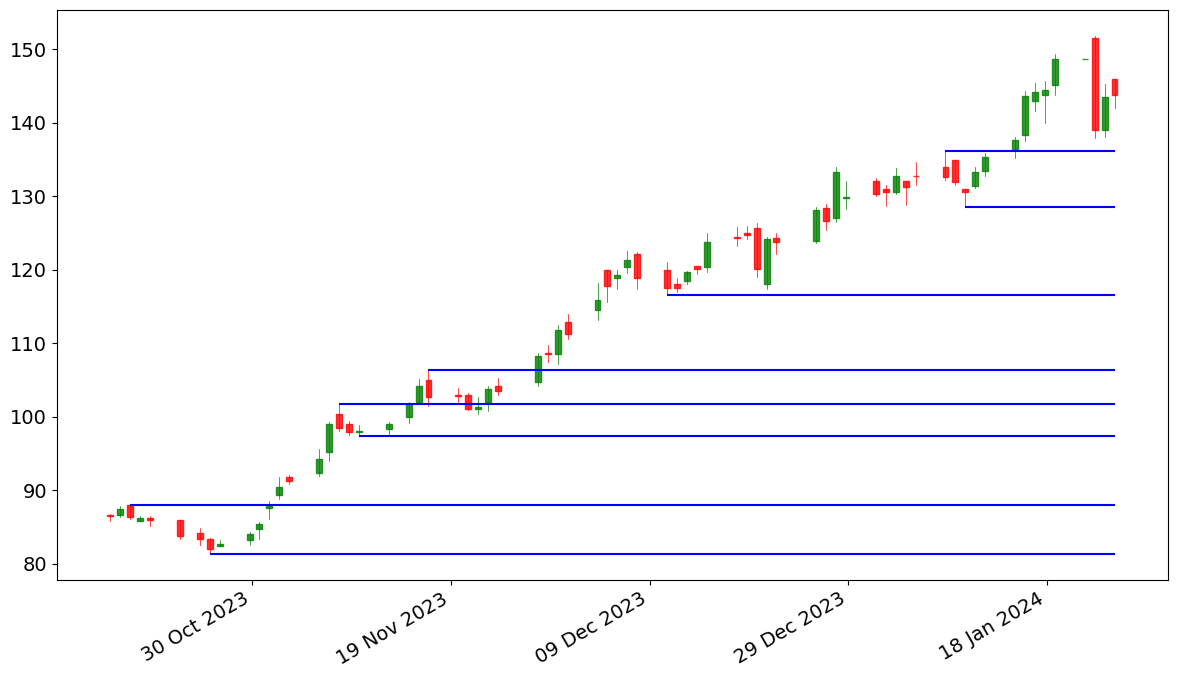

In [35]:
plot_all()
